In [1]:
# Import libraries
# For load, preprocess data and rule-based model
import pandas as pd

# For linear regression model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# For confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
try:
    df = pd.read_csv(r"C:\Users\jayas\Downloads\winequality-red.csv")
except FileNotFoundError:
    print("Error: File not found. Please check the path.")
except Exception as e:
    print(f"Unexpected error: {e}")
    
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Cleaning and Structuring

In [6]:
# Remove duplicates
try:
    duplicate_count = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_count}")
    
    df_clean = df.drop_duplicates().copy()
    print(f"New dataset shape after removing duplicates: {df_clean.shape}")
    
except Exception as e:
    print(f"Error during duplicate removal: {e}")


Number of duplicate rows: 240
New dataset shape after removing duplicates: (1359, 12)


In [7]:
 # Check if all columns are numeric
try:
    non_numeric = df_clean.select_dtypes(exclude=['number']).columns.tolist()
    
    if not non_numeric:
        print("All columns are numeric.")
    else:
        print("Non-numeric columns detected:", non_numeric)
        
except Exception as e:
    print(f"Error during data type inspection: {e}")

All columns are numeric.


In [8]:
# Summary statistics
try:
    print("Final dataset summary:")
except Exception as e:
    print(f"Error during final summary: {e}")
    
df_clean.describe()

Final dataset summary:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Exploratory Data Analysis (EDA)

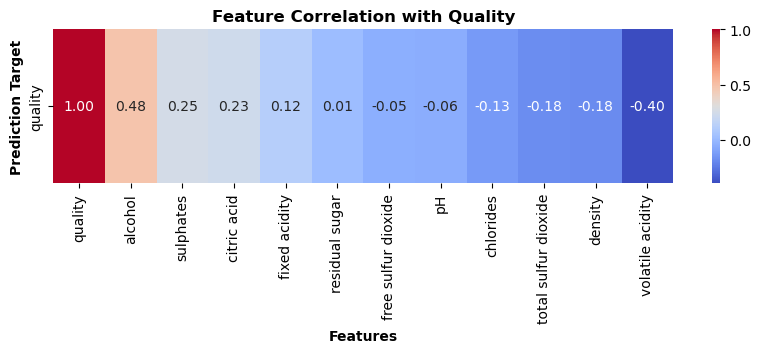

In [9]:
# Calculate correlation matrix for all numeric columns
corr_matrix = df_clean.corr()

# Set figure size to make the heatmap wide and readable
plt.figure(figsize=(10, 2))  # Wider than tall layout

# Plot heatmap showing correlation of each feature with 'quality'
sns.heatmap(
    corr_matrix[['quality']].sort_values(by='quality', ascending=False).T,  # Sort by strongest correlation
    annot=True,        # Show correlation values
    cmap='coolwarm',   # Color scale from blue (negative) to red (positive)
    fmt='.2f'          # Format numbers to 2 decimal places
)

# Add title and axis labels
plt.title('Feature Correlation with Quality', fontweight='bold', fontsize=12)
plt.xlabel('Features', fontweight='bold', fontsize=10)
plt.ylabel('Prediction Target', fontweight='bold', fontsize=10)

# Display the plot
plt.show()


# Rule-Based Prediction

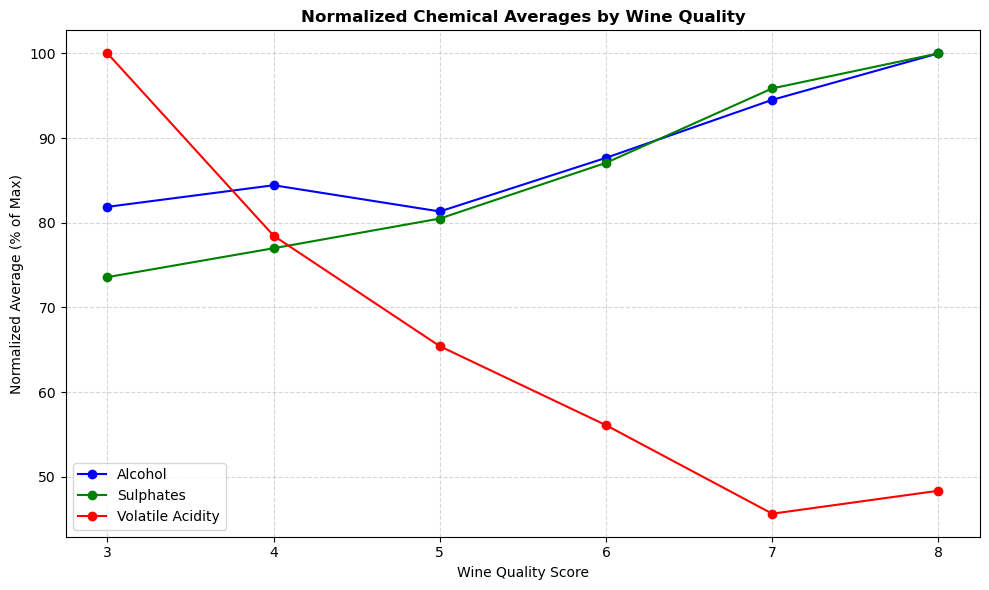

In [11]:
# Group by wine quality and compute mean values for selected features
avg_values = df_clean.groupby('quality')[['alcohol', 'sulphates', 'volatile acidity']].mean()

# Normalize each feature's mean to a 0–100% scale
normalized = avg_values.divide(avg_values.max()) * 100

# Create line plot for each normalized feature
plt.figure(figsize=(10, 6))
plt.plot(normalized.index, normalized['alcohol'], marker='o', label='Alcohol', color='blue')  # Alcohol trend
plt.plot(normalized.index, normalized['sulphates'], marker='o', label='Sulphates', color='green')  # Sulphates trend
plt.plot(normalized.index, normalized['volatile acidity'], marker='o', label='Volatile Acidity', color='red')  # Volatile acidity trend

# Add labels, title, legend, and grid
plt.xlabel('Wine Quality Score')
plt.ylabel('Normalized Average (% of Max)')
plt.title('Normalized Chemical Averages by Wine Quality', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Adjust layout to prevent clipping and display plot
plt.tight_layout()
plt.show()


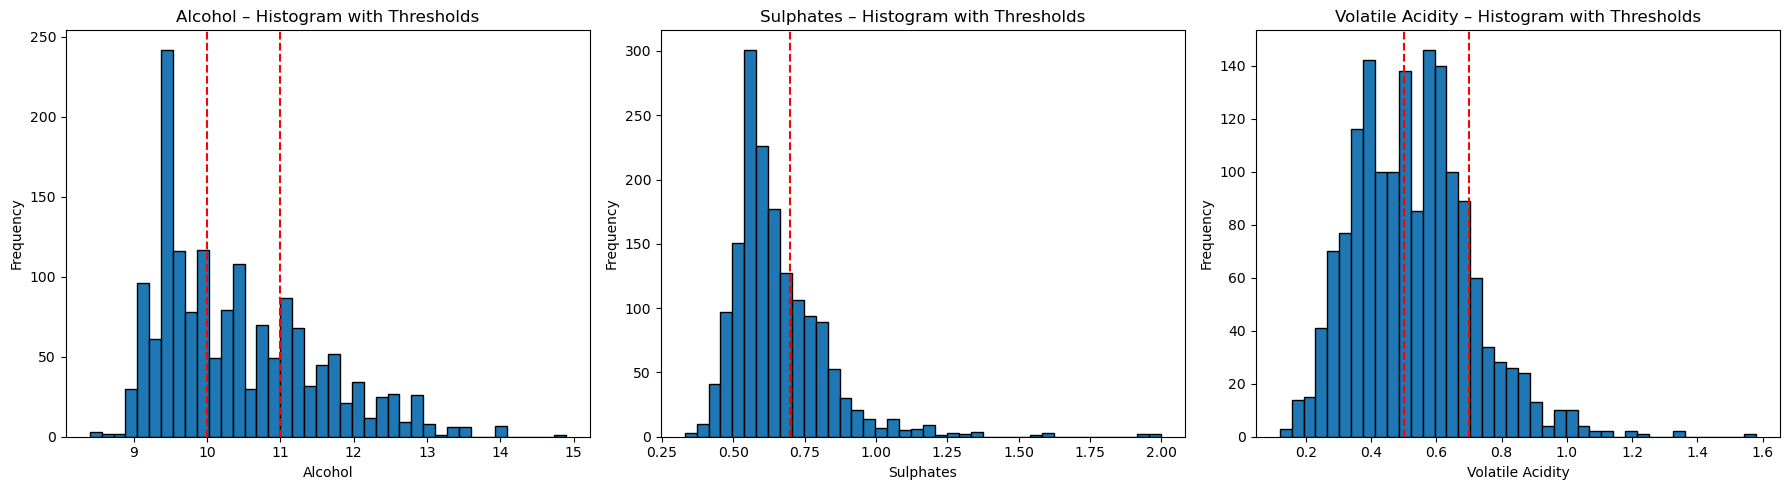

In [12]:
# Create subplots to visualize in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust figsize

# Alcohol histogram
axes[0].hist(df['alcohol'], bins=40, edgecolor='black')  # Plot histogram of alcohol content with 40 bins
axes[0].axvline(10, linestyle='--', color='red')         # Add red dashed line at threshold = 10 (low quality cutoff)
axes[0].axvline(11, linestyle='--', color='red')         # Add red dashed line at threshold = 11 (high quality cutoff)
axes[0].set_title('Alcohol – Histogram with Thresholds') # Set plot title
axes[0].set_xlabel('Alcohol')                            # Label x-axis
axes[0].set_ylabel('Frequency')                          # Label y-axis

# Sulphates histogram
axes[1].hist(df['sulphates'], bins=40, edgecolor='black')
axes[1].axvline(0.7, linestyle='--', color='red')
axes[1].set_title('Sulphates – Histogram with Thresholds')
axes[1].set_xlabel('Sulphates')
axes[1].set_ylabel('Frequency')

# Volatile Acidity histogram
axes[2].hist(df['volatile acidity'], bins=40, edgecolor='black')
axes[2].axvline(0.5, linestyle='--', color='red')
axes[2].axvline(0.7, linestyle='--', color='red')
axes[2].set_title('Volatile Acidity – Histogram with Thresholds')
axes[2].set_xlabel('Volatile Acidity')
axes[2].set_ylabel('Frequency')

# Tight layout for spacing and display
plt.tight_layout()
plt.show()

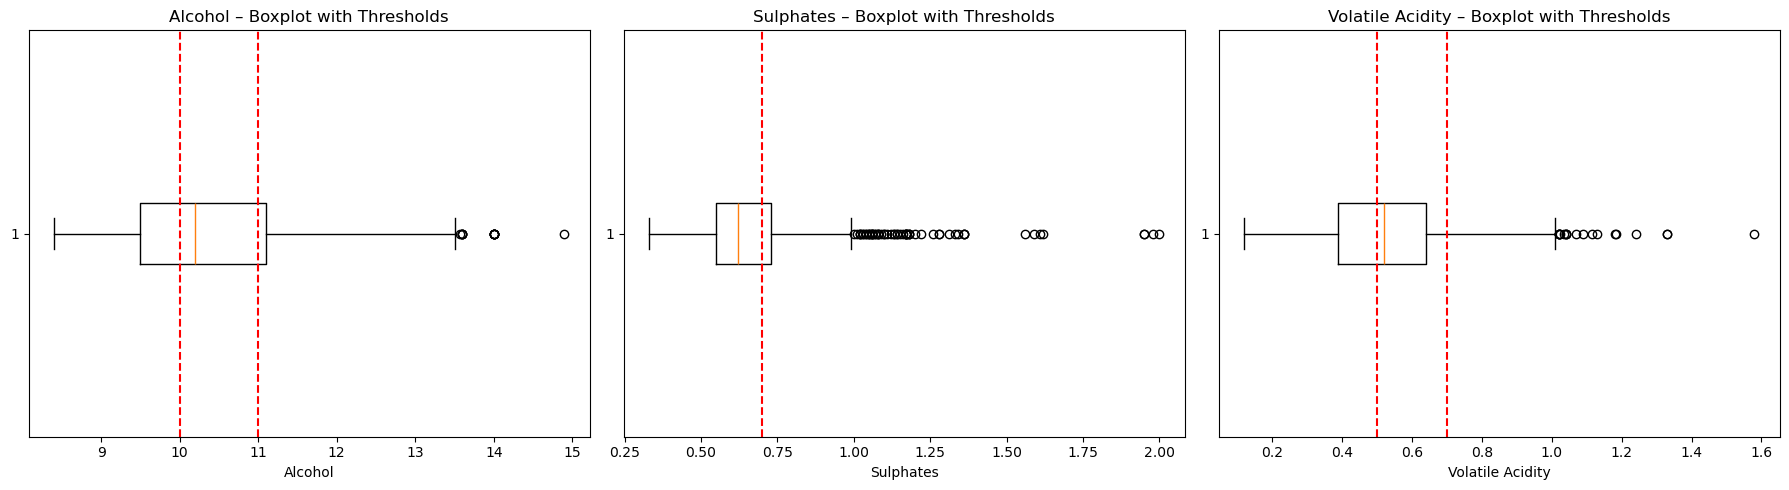

In [13]:
# Create subplots to visualize in one row
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Adjust figsize

# Alcohol boxplot
axes[0].boxplot(df['alcohol'].dropna(), vert=False)      # Create horizontal boxplot for alcohol values, excluding NaNs
axes[0].axvline(10, linestyle='--', color='red')         # Add red dashed line at 10% alcohol (low quality threshold)
axes[0].axvline(11, linestyle='--', color='red')         # Add red dashed line at 11% alcohol (high quality threshold)
axes[0].set_title('Alcohol – Boxplot with Thresholds')   # Set plot title
axes[0].set_xlabel('Alcohol')                            # Label x-axis

# Sulphates boxplot
axes[1].boxplot(df['sulphates'].dropna(), vert=False)
axes[1].axvline(0.7, linestyle='--', color='red')
axes[1].set_title('Sulphates – Boxplot with Thresholds')
axes[1].set_xlabel('Sulphates')

# Volatile Acidity boxplot
axes[2].boxplot(df['volatile acidity'].dropna(), vert=False)
axes[2].axvline(0.5, linestyle='--', color='red')
axes[2].axvline(0.7, linestyle='--', color='red')
axes[2].set_title('Volatile Acidity – Boxplot with Thresholds')
axes[2].set_xlabel('Volatile Acidity')

# Adjust layout
plt.tight_layout()
plt.show()


In [169]:
def predict_quality(row):
    # Rule 1: High alcohol and sulphates → High quality
    if row['alcohol'] > 11 and row['sulphates'] > 0.7:
        return 'High'
    
    # Rule 2: Moderate alcohol and low volatile acidity → Medium quality
    elif 10 <= row['alcohol'] <= 11 and row['volatile acidity'] < 0.5:
        return 'Medium'
    
    # Rule 3: Low alcohol or high volatile acidity → Low quality
    elif row['alcohol'] < 10 or row['volatile acidity'] > 0.7:
        return 'Low'
    
    # Default fallback
    else:
        return 'Medium'

# Apply rule-based prediction safely
try:
    # Make a copy of the DataFrame to avoid modifying the original
    df_clean = df_clean.copy()
    # Apply the rule-based prediction function row-wise
    df_clean['quality_rule'] = df_clean.apply(predict_quality, axis=1)
    # Confirm success
    print("Rule-based predictions applied successfully.")

except Exception as e:
    print(f"Error applying rule-based predictions: {e}")

# Preview results
try:
    print(df_clean[['alcohol', 'volatile acidity', 'sulphates', 'quality', 'quality_rule']].head(10))
except Exception as e:
    print(f"Error displaying preview: {e}")

Rule-based predictions applied successfully.
    alcohol  volatile acidity  sulphates  quality quality_rule
0       9.4              0.70       0.56        5          Low
1       9.8              0.88       0.68        5          Low
2       9.8              0.76       0.65        5          Low
3       9.8              0.28       0.58        6          Low
5       9.4              0.66       0.56        5          Low
6       9.4              0.60       0.46        5          Low
7      10.0              0.65       0.47        7       Medium
8       9.5              0.58       0.57        7          Low
9      10.5              0.50       0.80        5       Medium
10      9.2              0.58       0.54        5          Low


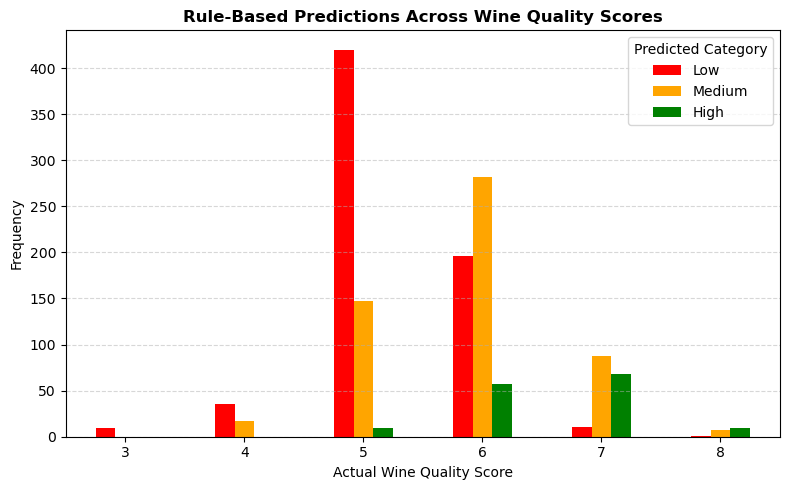

In [171]:
# Count how many times each rule-based prediction appears for each actual quality score
counts = df_clean.groupby(['quality', 'quality_rule']).size().unstack(fill_value=0)

# Ensure all quality scores from 3 to 8 are included
counts = counts.reindex(index=range(3, 9))

# Arrange columns in a consistent order: Low, Medium, High
counts = counts[['Low', 'Medium', 'High']]

# Create a grouped bar chart to show prediction distribution
counts.plot(kind='bar', figsize=(8, 5), color=['red', 'orange', 'green'])

# Add axis labels, title, legend and grid
plt.xlabel('Actual Wine Quality Score')
plt.ylabel('Frequency')
plt.title('Rule-Based Predictions Across Wine Quality Scores', fontweight='bold', fontsize=12)
plt.xticks(rotation=0) 
plt.legend(title='Predicted Category')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to prevent clipping and display plot
plt.tight_layout()
plt.show()


<Figure size 600x500 with 0 Axes>

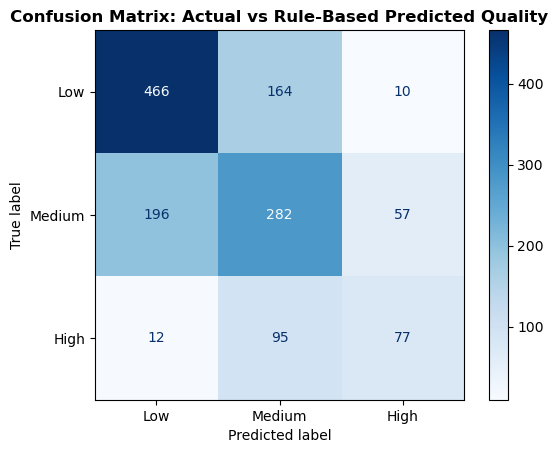

In [16]:
# Categorize actual quality scores into 'Low', 'Medium', and 'High'
df_clean.loc[:, 'quality_actual_label'] = pd.cut(df_clean['quality'],
                                      bins=[0, 5, 6, 10],
                                      labels=['Low', 'Medium', 'High'])

# Generate confusion matrix comparing actual labels vs rule-based predictions
cm = confusion_matrix(df_clean['quality_actual_label'], df_clean['quality_rule'], labels=['Low', 'Medium', 'High'])

# Create a display object for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Actual vs Rule-Based Predicted Quality', fontweight='bold', fontsize=12)
plt.show()


# Statistical Prediction (Linear Regression)

In [155]:
# Define features and target
try:
    # Drop target and rule-based columns if present, define predictors (X) and target (y)
    X = df_clean.drop(columns=['quality', 'quality_rule', 'quality_actual_label'], errors='ignore')
    y = df_clean['quality']
    print("Features and target defined.")
except Exception as e:
    print(f"Error defining features/target: {e}")

# Normalize features
try:
    scaler = StandardScaler()               # Initialize standard scaler
    X_scaled = scaler.fit_transform(X)      # Apply scaling to features
    print("Features normalized.")
except Exception as e:
    print(f"Error during feature scaling: {e}")

# Train-test split
try:
    # Split data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    print("Train-test split completed.")
except Exception as e:
    print(f"Error during train-test split: {e}")


Features and target defined.
Features normalized.
Train-test split completed.
Linear regression model trained.
MSE: 0.43100901


In [185]:
# Train linear regression model
try:
    model = LinearRegression()              # Initialize linear regression model
    model.fit(X_train, y_train)             # Fit model to training data
    print("Linear regression model trained.")
except Exception as e:
    print(f"Error training model: {e}")

# Predict and evaluate
try:
    y_pred = model.predict(X_test)          # Predict wine quality on test data
    print(f"MSE: {mean_squared_error(y_test, y_pred):.8f}")  # Print Mean Squared Error with 8 decimal precision
except Exception as e:
    print(f"Error during prediction/evaluation: {e}")


Linear regression model trained.
MSE: 0.43100901


In [187]:
# Train Ridge regression model
try:
    model = Ridge(alpha=59)                  # Initialize Ridge model with regularization strength α = 59
    model.fit(X_train, y_train)              # Fit model to training data
    print("Ridge regression model trained.")
except Exception as e:
    # Catch and report any errors during model training
    print(f"Error training model: {e}")

# Predict and evaluate
try:
    y_pred = model.predict(X_test)           # Predict wine quality on test data
    print(f"MSE: {mean_squared_error(y_test, y_pred):.8f}")  # Print Mean Squared Error with 8 decimal places
except Exception as e:
    print(f"Error during prediction/evaluation: {e}")
    

Ridge regression model trained.
MSE: 0.42750813


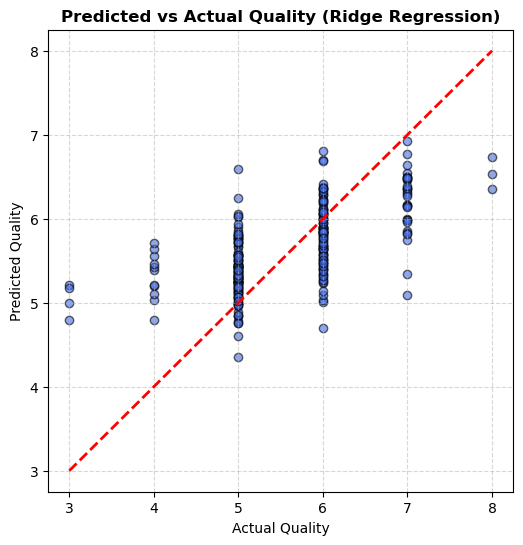

In [163]:
# Set up the figure size
plt.figure(figsize=(6,6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='black', color='royalblue')  # Visualizes prediction accuracy

# Reference line: perfect prediction (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Helps assess deviation from ideal

# Add plot title and axis labels
plt.title('Predicted vs Actual Quality (Ridge Regression)', fontweight='bold', fontsize=12)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()